In [13]:
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
import warnings; warnings.filterwarnings('ignore')

In [12]:
Acquisition = pd.read_csv('Customer Acqusition.csv')
Repayment = pd.read_csv('Repayment.csv')
spend = pd.read_csv('spend.csv')

In [3]:
Acquisition

,No,Customer,Age,City,Product,Limit,Company,Segment
0,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed
1,2,A2,71,CALCUTTA,Silver,100000.0,C2,Salaried_MNC
2,3,A3,34,COCHIN,Platimum,10000.0,C3,Salaried_Pvt
3,4,A4,47,BOMBAY,Platimum,10001.0,C4,Govt
4,5,A5,56,BANGALORE,Platimum,10002.0,C5,Normal Salary
...,...,...,...,...,...,...,...,...
95,96,A96,54,CHENNAI,Silver,100000.0,C19,Salaried_Pvt
96,97,A97,58,TRIVANDRUM,Platimum,10000.0,C20,Govt
97,98,A98,51,CALCUTTA,Platimum,10001.0,C21,Normal Salary
98,99,A99,35,CALCUTTA,Platimum,10002.0,C22,Self Employed


In [46]:
Acquisition['Product'].replace('Platimum','Platinum',inplace=True)
Acquisition

,No,Customer,Age,City,Product,Limit,Company,Segment
0,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed
1,2,A2,71,CALCUTTA,Silver,100000.0,C2,Salaried_MNC
2,3,A3,34,COCHIN,Platinum,10000.0,C3,Salaried_Pvt
3,4,A4,47,BOMBAY,Platinum,10001.0,C4,Govt
4,5,A5,56,BANGALORE,Platinum,10002.0,C5,Normal Salary
...,...,...,...,...,...,...,...,...
95,96,A96,54,CHENNAI,Silver,100000.0,C19,Salaried_Pvt
96,97,A97,58,TRIVANDRUM,Platinum,10000.0,C20,Govt
97,98,A98,51,CALCUTTA,Platinum,10001.0,C21,Normal Salary
98,99,A99,35,CALCUTTA,Platinum,10002.0,C22,Self Employed


In [5]:
Repayment

,SL No:,Customer,Month,Amount,Unnamed: 4
0,NaN,A1,12-Jan-04,495414.75,NaN
1,2.0,A1,3-Jan-04,245899.02,NaN
2,3.0,A1,15-Jan-04,259490.06,NaN
3,4.0,A1,25-Jan-04,437555.12,NaN
4,5.0,A1,17-Jan-05,165972.88,NaN
...,...,...,...,...,...
1518,NaN,NaN,NaN,NaN,NaN
1519,NaN,NaN,NaN,NaN,NaN
1520,NaN,NaN,NaN,NaN,NaN
1521,NaN,NaN,NaN,NaN,NaN


In [6]:
spend

,Sl No:,Customer,Month,Type,Amount
0,1,A1,12-Jan-04,JEWELLERY,485470.80
1,2,A1,3-Jan-04,PETRO,410556.13
2,3,A1,15-Jan-04,CLOTHES,23740.46
3,4,A1,25-Jan-04,FOOD,484342.47
4,5,A1,17-Jan-05,CAMERA,369694.07
...,...,...,...,...,...
1495,1496,A67,4-Feb-06,BUS TICKET,356872.73
1496,1497,A68,25-Mar-06,BUS TICKET,204971.10
1497,1498,A69,31-Mar-06,BUS TICKET,50449.44
1498,1499,A70,23-Mar-06,BUS TICKET,80593.94


# 1

# a

In [14]:
mean_age = Acquisition['Age'].mean()
Acquisition.loc[Acquisition['Age']<18,'Age'].mean()

14.666666666666666

# b

In [31]:
limit = pd.merge(left=Acquisition,right=spend,left_on='Customer',right_on='Customer',how='inner')
Spend_limit = limit.loc[limit['Amount']>limit['Limit'],'Amount']=limit['Limit']*0.5
Spend_limit

0       250000.0
1       250000.0
2       250000.0
3       250000.0
4       250000.0
          ...   
1495     50000.0
1496      5000.0
1497      5000.5
1498      5001.0
1499     50000.0
Name: Limit, Length: 1500, dtype: float64

In [24]:
limit

,No,Customer,Age,City,Product,Limit,Company,Segment,Sl No:,Month,Type,Amount
0,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,1,12-Jan-04,JEWELLERY,485470.80
1,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,2,3-Jan-04,PETRO,410556.13
2,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,3,15-Jan-04,CLOTHES,23740.46
3,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,4,25-Jan-04,FOOD,484342.47
4,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,5,17-Jan-05,CAMERA,369694.07
...,...,...,...,...,...,...,...,...,...,...,...,...
1495,96,A96,54,CHENNAI,Silver,100000.0,C19,Salaried_Pvt,98,25-Jan-04,BIKE,54729.66
1496,97,A97,58,TRIVANDRUM,Platimum,10000.0,C20,Govt,99,12-Jan-04,AUTO,69509.13
1497,98,A98,51,CALCUTTA,Platimum,10001.0,C21,Normal Salary,100,3-Jan-04,SHOPPING,142260.53
1498,99,A99,35,CALCUTTA,Platimum,10002.0,C22,Self Employed,101,15-Jan-04,AIR TICKET,45092.11


# c

In [19]:
repay_limit = pd.merge(left=Acquisition,right=Repayment,left_on='Customer',right_on='Customer',how='inner')
repay_limit_set = repay_limit.loc[repay_limit['Amount']>repay_limit['Limit'],'Limit']#=['Limit']
repay_limit_set

18      100000.0
19      100000.0
20      100000.0
21      100000.0
23      100000.0
          ...   
1486    100003.0
1495    100000.0
1496     10000.0
1497     10001.0
1498     10002.0
Name: Limit, Length: 600, dtype: float64

# 2

# a

In [67]:
#customers = Acquisition['Customer'].nunique()
#customers
cust = Acquisition.agg({'Customer':'count'})
cust

Customer    100
dtype: int64

# b

In [44]:
categories = spend['Type'].nunique()
categories

15

# c

In [3]:
spend_copy = spend.copy()
spend_copy

,Sl No:,Customer,Month,Type,Amount
0,1,A1,12-Jan-04,JEWELLERY,485470.80
1,2,A1,3-Jan-04,PETRO,410556.13
2,3,A1,15-Jan-04,CLOTHES,23740.46
3,4,A1,25-Jan-04,FOOD,484342.47
4,5,A1,17-Jan-05,CAMERA,369694.07
...,...,...,...,...,...
1495,1496,A67,4-Feb-06,BUS TICKET,356872.73
1496,1497,A68,25-Mar-06,BUS TICKET,204971.10
1497,1498,A69,31-Mar-06,BUS TICKET,50449.44
1498,1499,A70,23-Mar-06,BUS TICKET,80593.94


In [4]:
spend_copy['Month'] = pd.to_datetime(spend_copy['Month'])

In [17]:
spend_copy['year'] = spend_copy['Month'].dt.year
spend_copy['month'] = spend_copy['Month'].dt.month
spend_copy['day'] = spend_copy['Month'].dt.day
spend_copy['month'].replace([1,2,3,4,5,6,7,8,9,10,11,12],
                            ['Jan','Feb','March','April','May','June','July','Aug','Sep','Oct','Nov','Dec'], inplace=True)
#spend_copy['month'].replace('2','Feb', inplace=True)
#spend_copy['month'].replace('3','March', inplace=True)
#spend_copy['month'].replace('4','April', inplace=True)
#spend_copy['month'].replace('5','May', inplace=True) 
spend_copy

,Sl No:,Customer,Month,Type,Amount,year,month,day
0,1,A1,2004-01-12,JEWELLERY,485470.80,2004,Jan,12
1,2,A1,2004-01-03,PETRO,410556.13,2004,Jan,3
2,3,A1,2004-01-15,CLOTHES,23740.46,2004,Jan,15
3,4,A1,2004-01-25,FOOD,484342.47,2004,Jan,25
4,5,A1,2005-01-17,CAMERA,369694.07,2005,Jan,17
...,...,...,...,...,...,...,...,...
1495,1496,A67,2006-02-04,BUS TICKET,356872.73,2006,Feb,4
1496,1497,A68,2006-03-25,BUS TICKET,204971.10,2006,March,25
1497,1498,A69,2006-03-31,BUS TICKET,50449.44,2006,March,31
1498,1499,A70,2006-03-23,BUS TICKET,80593.94,2006,March,23


In [21]:
avg_spend =  pd.pivot_table(data =spend_copy,index= 'month',values ='Amount', aggfunc='mean')
avg_spend

,Amount
month,
April,236671.847533
Aug,236056.328571
Dec,208987.020357
Feb,233037.216471
Jan,256221.133553
July,268042.287143
June,241329.181250
March,246255.783723
May,241277.023476


# d

In [17]:
repay_copy = Repayment.copy()
repay_copy

,SL No:,Customer,Month,Amount,Unnamed: 4
0,NaN,A1,12-Jan-04,495414.75,NaN
1,2.0,A1,3-Jan-04,245899.02,NaN
2,3.0,A1,15-Jan-04,259490.06,NaN
3,4.0,A1,25-Jan-04,437555.12,NaN
4,5.0,A1,17-Jan-05,165972.88,NaN
...,...,...,...,...,...
1518,NaN,NaN,NaN,NaN,NaN
1519,NaN,NaN,NaN,NaN,NaN
1520,NaN,NaN,NaN,NaN,NaN
1521,NaN,NaN,NaN,NaN,NaN


In [18]:
repay_copy['Month'] = pd.to_datetime(repay_copy['Month'])

In [19]:
repay_copy['year'] = repay_copy['Month'].dt.year
repay_copy['month'] = repay_copy['Month'].dt.month
repay_copy['day'] = repay_copy['Month'].dt.day
repay_copy

,SL No:,Customer,Month,Amount,Unnamed: 4,year,month,day
0,NaN,A1,2004-01-12,495414.75,NaN,2004.0,1.0,12.0
1,2.0,A1,2004-01-03,245899.02,NaN,2004.0,1.0,3.0
2,3.0,A1,2004-01-15,259490.06,NaN,2004.0,1.0,15.0
3,4.0,A1,2004-01-25,437555.12,NaN,2004.0,1.0,25.0
4,5.0,A1,2005-01-17,165972.88,NaN,2005.0,1.0,17.0
...,...,...,...,...,...,...,...,...
1518,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN
1519,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN
1520,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN
1521,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN


In [10]:
avg_repayment =  pd.pivot_table(data = repay_copy,index='month',values ='Amount', aggfunc='mean')
avg_repayment

,Amount
month,
1.0,245121.019624
2.0,248756.162368
3.0,241654.966393
4.0,259649.413200
5.0,257669.622782
6.0,220647.477083
7.0,253512.325102
8.0,254564.734898
9.0,226865.354750


# e

In [163]:
profit = [avg_repayment - avg_spend]
profit

[month           1.0           2.0         3.0           4.0           5.0   \
 Amount -11100.113929  15718.945898 -4600.81733  22977.565667  16392.599306   
 
 month           6.0           7.0           8.0          9.0           10.0  \
 Amount -20681.704167 -14529.962041  18508.406327  7495.462607  24955.230476   
 
 month           11.0          12.0  
 Amount -19232.479881  77570.932143  ]

# f

In [171]:
spend.head(5)

,Sl No:,Customer,Month,Type,Amount
0,1,A1,12-Jan-04,JEWELLERY,485470.80
1,2,A1,3-Jan-04,PETRO,410556.13
2,3,A1,15-Jan-04,CLOTHES,23740.46
3,4,A1,25-Jan-04,FOOD,484342.47
4,5,A1,17-Jan-05,CAMERA,369694.07


# g

In [4]:
limit = pd.merge(left=Acquisition,right=spend,left_on='No',right_on='Sl No:',how='inner')
max_spend = pd.pivot_table(data = limit,index='City',values ='Amount', aggfunc='max').iloc[:1]
max_spend

,Amount
City,
BANGALORE,485470.8


# h

In [72]:
limit = pd.merge(left=Acquisition,right=spend,left_on='No',right_on='Sl No:',how='inner')
max_spend_age = pd.pivot_table(data = limit,index='Age',values ='Amount', aggfunc='max')
spend_age = max_spend_age.sort_values(by = 'Amount', ascending = False).iloc[:1]
spend_age

,Amount
Age,
76,485470.8


# i

In [10]:
sorted_cust = Repayment.sort_values(by='Amount',ascending = False)
top_10 = sorted_cust.head(10)
top_10

,SL No:,Customer,Month,Amount,Unnamed: 4
334,335.0,A11,4-Apr-06,499930.66,NaN
1369,1370.0,A40,3-Feb-05,498705.93,NaN
574,575.0,A13,3-Jan-04,498284.19,NaN
1208,1209.0,A53,3-Feb-05,498258.64,NaN
1133,1134.0,A36,5-Feb-04,498238.63,NaN
535,536.0,A12,3-Jul-06,498001.25,NaN
949,950.0,A40,31-Mar-06,497928.27,NaN
90,91.0,A89,1-Apr-06,497237.97,NaN
1154,1155.0,A57,12-Jan-04,497223.08,NaN
592,593.0,A12,28-Feb-05,496791.06,NaN


# 3

In [19]:
spend_copy

,Sl No:,Customer,Month,Type,Amount,year,month,day
0,1,A1,2004-01-12,JEWELLERY,485470.80,2004,1,12
1,2,A1,2004-01-03,PETRO,410556.13,2004,1,3
2,3,A1,2004-01-15,CLOTHES,23740.46,2004,1,15
3,4,A1,2004-01-25,FOOD,484342.47,2004,1,25
4,5,A1,2005-01-17,CAMERA,369694.07,2005,1,17
...,...,...,...,...,...,...,...,...
1495,1496,A67,2006-02-04,BUS TICKET,356872.73,2006,2,4
1496,1497,A68,2006-03-25,BUS TICKET,204971.10,2006,3,25
1497,1498,A69,2006-03-31,BUS TICKET,50449.44,2006,3,31
1498,1499,A70,2006-03-23,BUS TICKET,80593.94,2006,3,23


In [34]:
limit = pd.merge(left=Acquisition,right=spend_copy,left_on='No',right_on='Sl No:',how='inner')
City_wise = pd.pivot_table(data = limit ,index = ['City','Product'], columns = 'year',values='Amount')
City_wise

year                          2004           2005         2006
City       Product                                            
BANGALORE  Gold      485470.800000  162417.220000  184919.9200
           Platimum  139814.590000  287337.810000          NaN
           Silver    390850.960000  207823.166667   42358.5000
BOMBAY     Gold      457931.430000  184566.295000  224453.2950
           Platimum  240093.306667  187688.150000          NaN
           Silver              NaN   47380.560000  427945.0350
CALCUTTA   Gold                NaN  106836.680000  360250.6925
           Platimum  131164.233333  143536.913333  356733.4800
           Silver    410556.130000   73244.250000  325796.5900
CHENNAI    Gold      177417.810000  275144.420000          NaN
           Platimum            NaN  285304.580000   22463.6500
           Silver    312714.370000   38269.940000  177942.0700
COCHIN     Gold                NaN  266602.846667  159761.0560
           Platimum  106876.045000  277054.323333  166144.9300
           Silver    363716.316667   23370.200000   31048.9300
DELHI      Gold                NaN  188171.640000  212889.9400
           Platimum            NaN  395078.960000          NaN
           Silver              NaN  248565.340000          NaN
PATNA      Gold      297505.090000            NaN  200051.1100
           Platimum            NaN            NaN  343548.5900
           Silver    155562.580000  319538.350000  379401.5300
TRIVANDRUM Gold                NaN            NaN   66432.3700
           Platimum  240401.500000  275465.990000          NaN
           Silver    321903.620000            NaN  224642.2850

<AxesSubplot:xlabel='City,Product'>

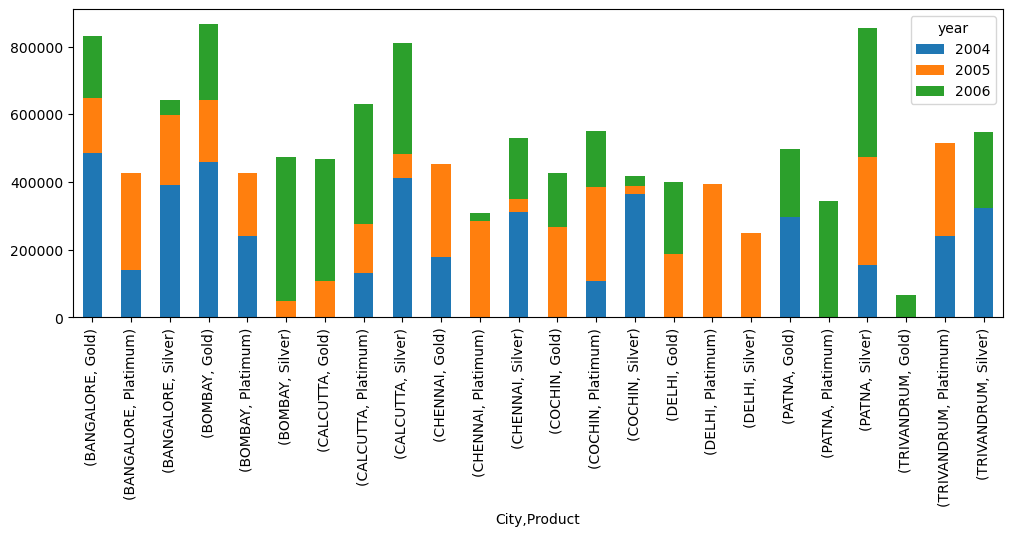

In [12]:
df = pd.pivot_table(data=limit,index = ['City','Product'], columns = 'year',values='Amount')

df.plot(kind='bar',stacked = True,figsize=[12,4])

# 4

# a

array([<AxesSubplot:ylabel='April'>, <AxesSubplot:ylabel='Aug'>,
       <AxesSubplot:ylabel='Dec'>, <AxesSubplot:ylabel='Feb'>,
       <AxesSubplot:ylabel='Jan'>, <AxesSubplot:ylabel='July'>,
       <AxesSubplot:ylabel='June'>, <AxesSubplot:ylabel='March'>,
       <AxesSubplot:ylabel='May'>, <AxesSubplot:ylabel='Nov'>,
       <AxesSubplot:ylabel='Oct'>, <AxesSubplot:ylabel='Sep'>],
      dtype=object)

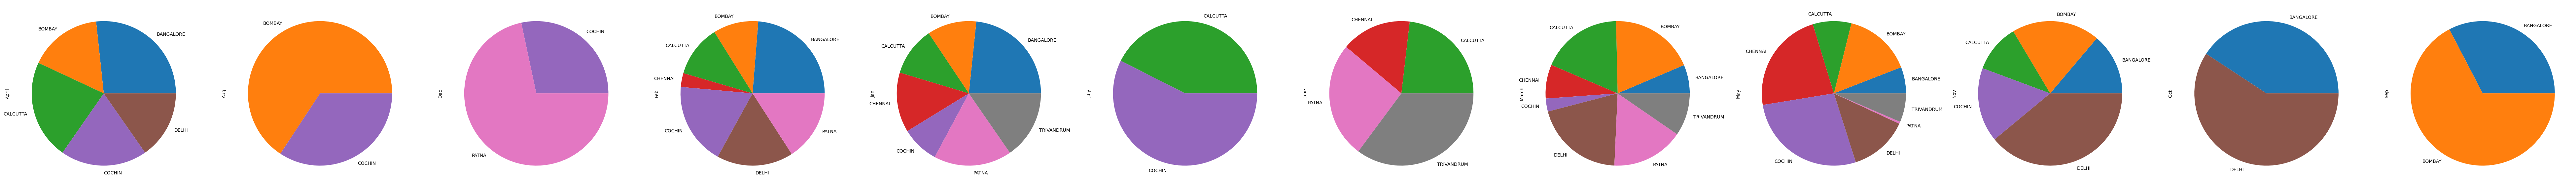

In [20]:
df = pd.pivot_table(data=limit,index = ['City'], columns = 'month',values='Amount')
#df.plot(kind='bar',stacked = False,figsize=[18,7])#.legend(loc='upper right')
df.plot(kind='pie',x='City',subplots = True,figsize=[100,50],legend=False)

# b

In [44]:
categories = spend['Type'].unique()
categories

array(['JEWELLERY', 'PETRO', 'CLOTHES', 'FOOD', 'CAMERA', 'SANDALS',
       'CAR', 'BIKE', 'AUTO', 'SHOPPING', 'AIR TICKET', 'BUS TICKET',
       'TRAIN TICKET', 'RENTAL', 'MOVIE TICKET'], dtype=object)

<AxesSubplot:xlabel='year'>

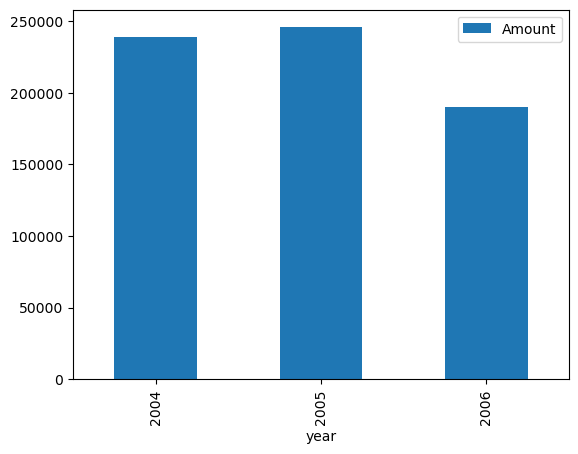

In [40]:
#air = (spend_copy.Type=='AIR TICKET')&(spend_copy.year==(['2004','2005','2006']))
#ticket = air['Amount'
air = spend_copy[spend_copy.Type=='AIR TICKET']
air.pivot_table(index = 'year',values='Amount').plot(kind='bar')#,figsize=[12,5])

# c

<AxesSubplot:xlabel='Product'>

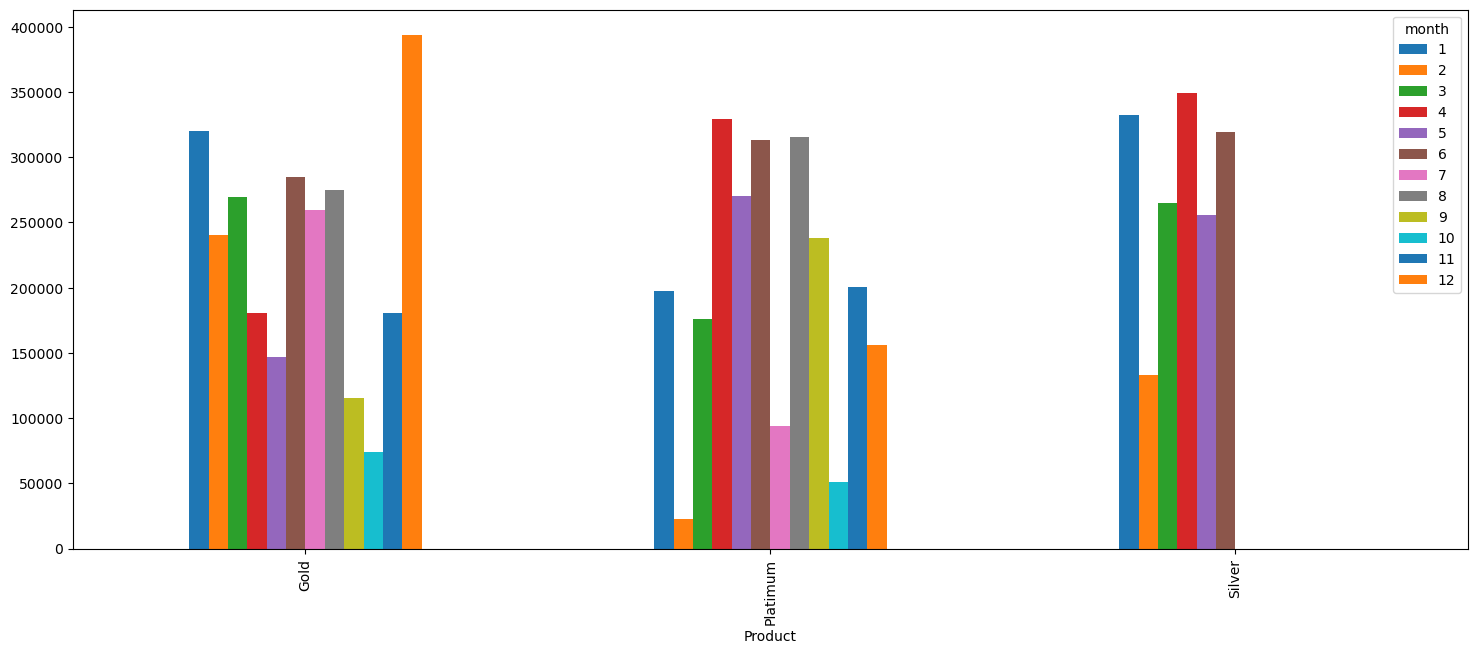

In [51]:
df = pd.pivot_table(data=limit,index = 'Product', columns = 'month',values='Amount')
df.plot(kind='bar',stacked = False,figsize=[18,7])
#month of june seems to be stable

# 5

In [47]:
top_10 = pd.merge(left=Acquisition,right=repay_copy,left_on='Customer',right_on='Customer',how='inner')

def report_top_10(product,timeperiod):
     
    if product.lower()=='gold' and timeperiod.lower()=='monthly':
        
        pivot = top_10.pivot_table(index=['Product','City','Customer'],columns='month',aggfunc='sum',values='Amount')
        
        result = pivot.loc[('Gold',['BANGALORE','COCHIN','CALCUTTA','BOMBAY','CHENNAI','TRIVANDRUM','PATNA','DELHI']),:]
        
    elif product.lower()=='gold' and timeperiod.lower()=='yearly':
        
        pivot = top_10.pivot_table(index=['Product','City','Customer'],columns='year',aggfunc='sum',values='Amount')
        
        result = pivot.loc[('Gold',['BANGALORE','COCHIN','CALCUTTA','BOMBAY','CHENNAI','TRIVANDRUM','PATNA','DELHI']),:]
    
    elif product.lower()=='silver' and timeperiod.lower()=='monthly':
        
        pivot = top_10.pivot_table(index=['Product','City','Customer'],columns='month',aggfunc='sum',values='Amount')
        
        result = pivot.loc[('Silver',['BANGALORE','COCHIN','CALCUTTA','BOMBAY','CHENNAI','TRIVANDRUM','PATNA','DELHI']),:]
    
    elif product.lower()=='silver' and timeperiod.lower()=='yearly':
        
        pivot = top_10.pivot_table(index=['Product','City','Customer'],columns='year',aggfunc='sum',values='Amount')
        
        result = pivot.loc[('Silver',['BANGALORE','COCHIN','CALCUTTA','BOMBAY','CHENNAI','TRIVANDRUM','PATNA','DELHI']),:]
    
    if product.lower()=='platinum' and timeperiod.lower()=='monthly':
        
        pivot = top_10.pivot_table(index=['Product','City','Customer'],columns='month',aggfunc='sum',values='Amount')
        
        result = pivot.loc[('Platinum',['BANGALORE','COCHIN','CALCUTTA','BOMBAY','CHENNAI','TRIVANDRUM','PATNA','DELHI']),:]
    
    elif product.lower()=='platinum' and timeperiod.lower()=='yearly':
        
        pivot = top_10.pivot_table(index=['Product','City','Customer'],columns='year',aggfunc='sum',values='Amount')
        
        result = pivot.loc[('Platinum',['BANGALORE','COCHIN','CALCUTTA','BOMBAY','CHENNAI','TRIVANDRUM','PATNA','DELHI']),:]
    
    return result              

In [48]:
report_top_10(product='Platinum', timeperiod='monthly')

month                               1.0         2.0         3.0         4.0   \
Product  City       Customer                                                   
Platinum BANGALORE  A19        501537.05   477491.51   513593.40   777013.43   
                    A37       1146853.78  1106271.48   643390.71  1028530.57   
                    A5        1117589.04   165348.26   716704.70     7276.60   
                    A52        673659.66   385345.25   996688.61   433138.67   
         COCHIN     A21       2461631.77  1273008.15   867387.56   877084.23   
                    A3         412149.80   829136.79         NaN   416028.53   
                    A35              NaN   964574.60   450091.26   451765.18   
                    A41       2089998.54   509624.20   499724.79   147383.00   
                    A50        482111.51   521586.07  1388039.34   400356.35   
                    A54       1154398.99  1149119.64   100719.74  1025491.68   
                    A83              NaN         NaN   132844.13         NaN   
         CALCUTTA   A20       1194669.87   434422.66   562667.26  1574589.07   
                    A34              NaN   434527.15   333955.81   252926.33   
                    A40       1749083.51   937643.24  1176947.70         NaN   
                    A49        814593.08  1443241.60  1128617.99   839940.72   
                    A69        140533.08         NaN         NaN         NaN   
                    A98        337815.57         NaN         NaN         NaN   
                    A99         25682.73         NaN         NaN         NaN   
         BOMBAY     A33              NaN  1118708.88  1018256.46         NaN   
                    A36        883551.47  1143572.07   345065.63  1670108.19   
                    A4         314700.58   525346.48   271095.26   100644.99   
                    A51        912432.05   515389.66   339411.84   315663.16   
                    A70              NaN   327639.37         NaN         NaN   
                    A71              NaN    30997.74         NaN         NaN   
         CHENNAI    A38       1655584.31  1365681.76   775994.68   369151.51   
                    A47       1301707.96  1847459.98   806655.09   933984.21   
                    A56         36537.90   413912.92  1500854.63   770261.09   
         TRIVANDRUM A39       1565119.57  1212860.65  1141202.46   472407.74   
                    A48        884683.42  1197704.45  1532981.58  1319286.12   
                    A97        121874.90         NaN         NaN         NaN   
         PATNA      A55        781731.00  1124130.33   483681.85   619774.41   
         DELHI      A53        469199.33   907752.01   199377.19  1102590.32   

month                               5.0        6.0        7.0         8.0   \
Product  City       Customer                                                 
Platinum BANGALORE  A19        696628.83   55869.98  281361.68         NaN   
                    A37        602852.30  606994.42        NaN   368760.27   
                    A5         367110.79        NaN        NaN         NaN   
                    A52        145665.69        NaN  470475.57   823750.27   
         COCHIN     A21        548382.97  390402.40  108209.03  1321914.34   
                    A3         136493.67        NaN        NaN         NaN   
                    A35              NaN        NaN  404849.03   252064.03   
                    A41       1999863.05        NaN        NaN     6865.68   
                    A50        585703.95  206150.39        NaN   314859.52   
                    A54        494339.29        NaN        NaN         NaN   
                    A83              NaN        NaN        NaN         NaN   
         CALCUTTA   A20              NaN        NaN  237612.00   213205.01   
                    A34        197323.24  104781.85  223157.52   498456.34   
                    A40       1401293.97        NaN  242107.49   488742.81   
                    A49       1

In [32]:
top_10

,No,Customer,Age,City,Product,Limit,Company,Segment,SL No:,Month,Amount,Unnamed: 4,year,month,day
0,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,NaN,2004-01-12,495414.75,NaN,2004.0,1.0,12.0
1,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,2.0,2004-01-03,245899.02,NaN,2004.0,1.0,3.0
2,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,3.0,2004-01-15,259490.06,NaN,2004.0,1.0,15.0
3,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,4.0,2004-01-25,437555.12,NaN,2004.0,1.0,25.0
4,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,5.0,2005-01-17,165972.88,NaN,2005.0,1.0,17.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,96,A96,54,CHENNAI,Silver,100000.0,C19,Salaried_Pvt,98.0,2004-01-25,310992.30,NaN,2004.0,1.0,25.0
1496,97,A97,58,TRIVANDRUM,Platimum,10000.0,C20,Govt,99.0,2004-01-12,121874.90,NaN,2004.0,1.0,12.0
1497,98,A98,51,CALCUTTA,Platimum,10001.0,C21,Normal Salary,100.0,2004-01-03,337815.57,NaN,2004.0,1.0,3.0
1498,99,A99,35,CALCUTTA,Platimum,10002.0,C22,Self Employed,101.0,2004-01-15,25682.73,NaN,2004.0,1.0,15.0
